Task 5

In [5]:
from itertools import combinations
import random
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import re
import matplotlib.colors as mcolors
import time
from datetime import timedelta

In [6]:
def read_signed_graph_from_file(file_path):
    graph = {}
    with open(file_path, 'r') as file:
        for line in file:
            source, target, weight = map(int, line.strip().split())
            if source not in graph:
                graph[source] = []
            if target not in graph:
                graph[target] = []
            graph[source].append((target, weight))
            graph[target].append((source, weight))
    return graph

def compute_max_degrees(graph):
    max_degree = 0
    for node in graph:
        # Initialize variables to count positive and negative degrees of the current vertex
        positive_degree = 0
        negative_degree = 0
        for neighbor, sign in graph[node]:
            # Count positive and negative edges
            if sign == 1:
                positive_degree += 1
            else:
                negative_degree += 1

        
        total_degree = positive_degree - negative_degree
        if total_degree >= 1:
            max_degree = max(max_degree, positive_degree)
        else:
            max_degree = max(max_degree, 0)
    return max_degree


In [7]:
def check_condition2(s, sbar, pos_count = 0):
    is_check = False
    for s_node in s:
        if s_node not in asd:
            neg_count = 0
            for sbar_node in sbar:
                for nei, sign in graph[sbar_node]:
                    if nei == s_node:
                        if sign == -1:
                            neg_count += 1
            if pos_count + 1 >= neg_count:
                is_check = True
    
    if is_check:
        asd.append(s) 
            
def check_condition1(s):
    is_statisfied = False
    for vertex1 in s:
        pos_count = 0
        neg_count = 0
        for nei, sign in graph[vertex1]:
            for vertex2 in s:
                if nei == vertex2:
                    if sign == 1:
                        pos_count += 1
                    else:
                        neg_count += 1
        if pos_count + 1 >= neg_count:
            is_statisfied = True
        else:
            is_statisfied = False
            break
    return is_statisfied, pos_count


def preparing_edges_to_visualize(file_path):
    edges = []
    with open(file_path, "r") as file:
        for line in file:
            #u, v, sign = map(int, line.strip().split("\t"))
            u, v, sign = map(int, re.split(r'\t|\s+', line.strip()))
            edges.append((u, v, {'sign': sign}))
    return edges

Maximum degree is 0
Smallest Defensive Alliance
[(1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8)]


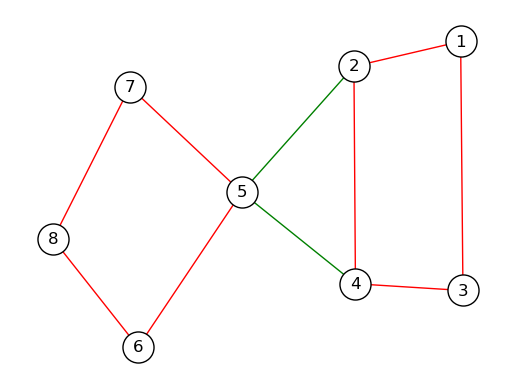

<Figure size 800x600 with 0 Axes>

In [35]:
file_path = r"/Users/mac/Desktop/Desktop/RCS_Signed_Graph/Meeting_2/graph_check/ads_graph_check5.txt"

# read graph and convert it into dictionary 
graph = read_signed_graph_from_file(file_path) 

# find max degree of the graph and if max degree is 3 then check for Smallest defensive alliance, else print
max_degree = compute_max_degrees(graph)
print("Maximum degree is",max_degree)
if max_degree <= 3:
    
    # take every nodes from graph as list
    nodes = list(graph.keys())
    asd = list() # creating empty list of defencise alliance
    
    # Generating all 6 combinations
    for i in range(1, len(nodes)):
        if not asd: #if asd list is empty then continue finding asd 
            s = list(combinations(nodes, i))
            for combo in s:
                s = combo 
                sbar = [x for x in nodes if x not in s]
    #             print(s,sbar)
                if len(s) > 1:
    #                 print("combination length greater 1")
                    is_checked, pos_count = check_condition1(s)
                    if is_checked:
                        check_condition2(s, sbar, pos_count)
                else:
                    check_condition2(s,sbar) 
        else:
            break
         
    if not asd:
        print("There is no Smallest Defensive Alliance for this graph")
    else:
        print("Smallest Defensive Alliance")
        print(asd) 
else:
    print("The maximum degree of this graph is not 3")
    
    
edges = preparing_edges_to_visualize(file_path)

# Create a signed graph
signed_graph = nx.Graph()
signed_graph.add_edges_from(edges)

# Visualization
pos = nx.spring_layout(signed_graph)
positive_edges = [(u, v) for u, v, data in signed_graph.edges(data=True) if data['sign'] == 1]
negative_edges = [(u, v) for u, v, data in signed_graph.edges(data=True) if data['sign'] == -1]

asd_list = list(set(item for sublist in asd for item in sublist))

# Initialize lists for clustering
clu = [list(filter(lambda x: x in asd_list, list(graph.keys()))), list(filter(lambda x: x not in asd_list, list(graph.keys())))]

# Create a dictionary to map clusters to colors
all_colors = list(mcolors.CSS4_COLORS.keys())
random.shuffle(all_colors)
cluster_colors = {tuple(cluster): all_colors[i % len(all_colors)] for i, cluster in enumerate(clu)}

# for cluster in clu:
#     color = cluster_colors[tuple(cluster)]
#     nx.draw_networkx_nodes(signed_graph, pos, nodelist = list(graph.keys()), node_color=color, node_size=500, edgecolors='black', linewidths=1.0)
nx.draw_networkx_nodes(signed_graph, pos, nodelist = list(graph.keys()), node_color="white", node_size=500, edgecolors='black', linewidths=1.0)
nx.draw_networkx_edges(signed_graph, pos, edgelist=positive_edges, edge_color='green')
nx.draw_networkx_edges(signed_graph, pos, edgelist=negative_edges, edge_color='red')
nx.draw_networkx_labels(signed_graph, pos, font_size=12, font_color='black')

plt.axis('off')
plt.figure(figsize=(8,6))
plt.show()